In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df=pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col='Month')

In [7]:
df.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Exploratory Data Analysis

<Axes: xlabel='Month'>

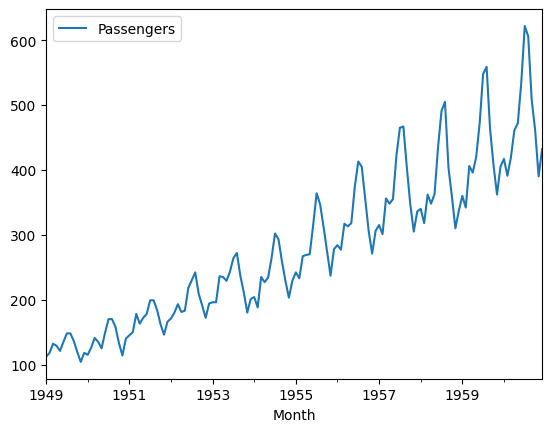

In [8]:
df.plot()

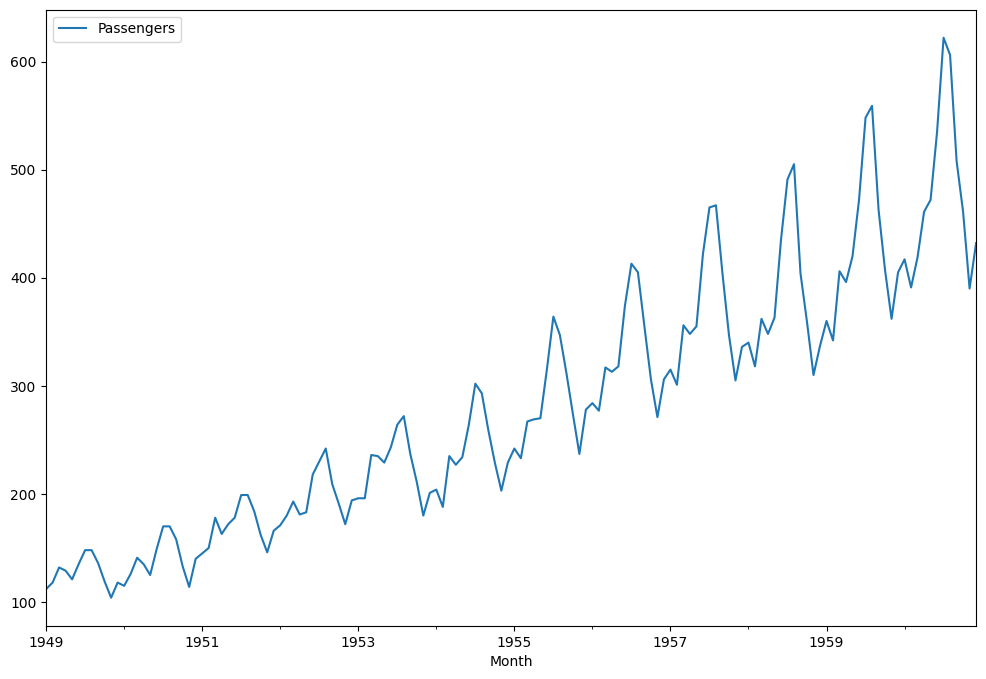

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df.plot()
plt.show()

### Decomposing the Time Series

In [10]:
Add_decomposition = seasonal_decompose(df, model = 'additive', period= 12 )

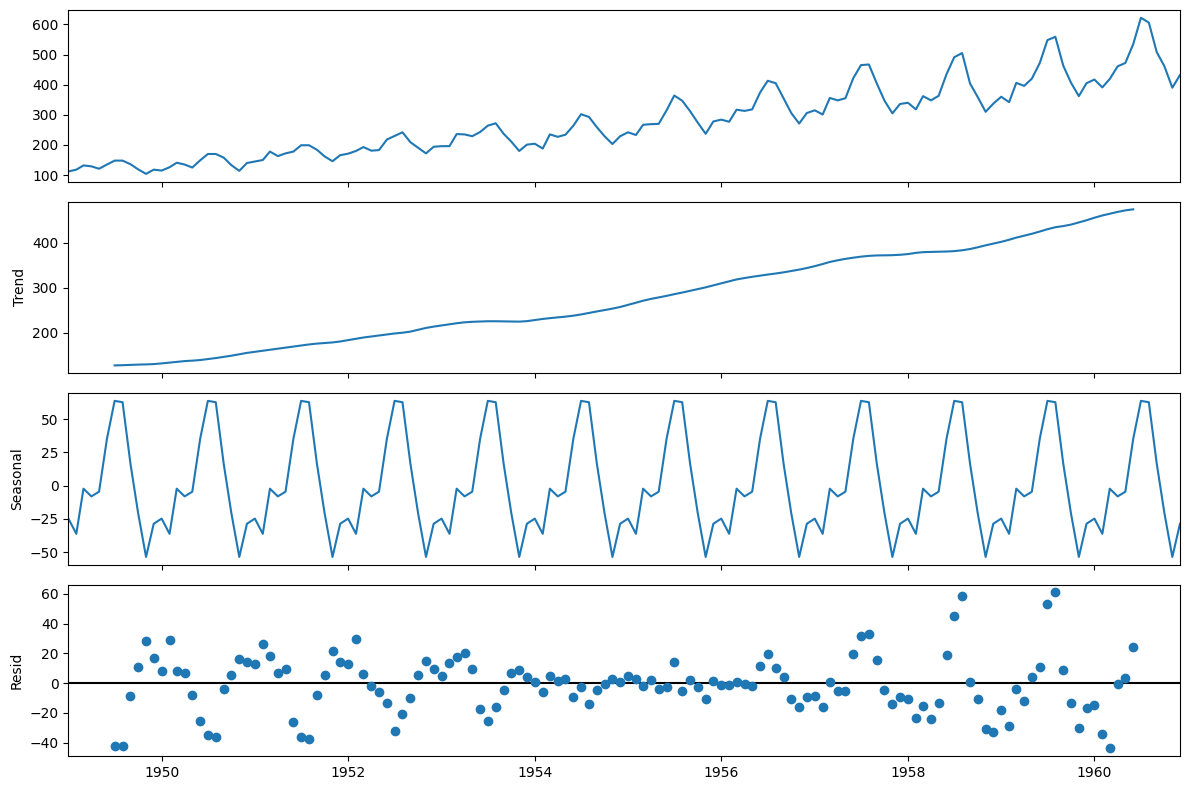

In [11]:
rcParams['figure.figsize'] = 12,8
Add_decomposition.plot()
plt.show()

In [12]:
Mul_decomposition = seasonal_decompose(df, model = 'multiplicative', period= 12 )

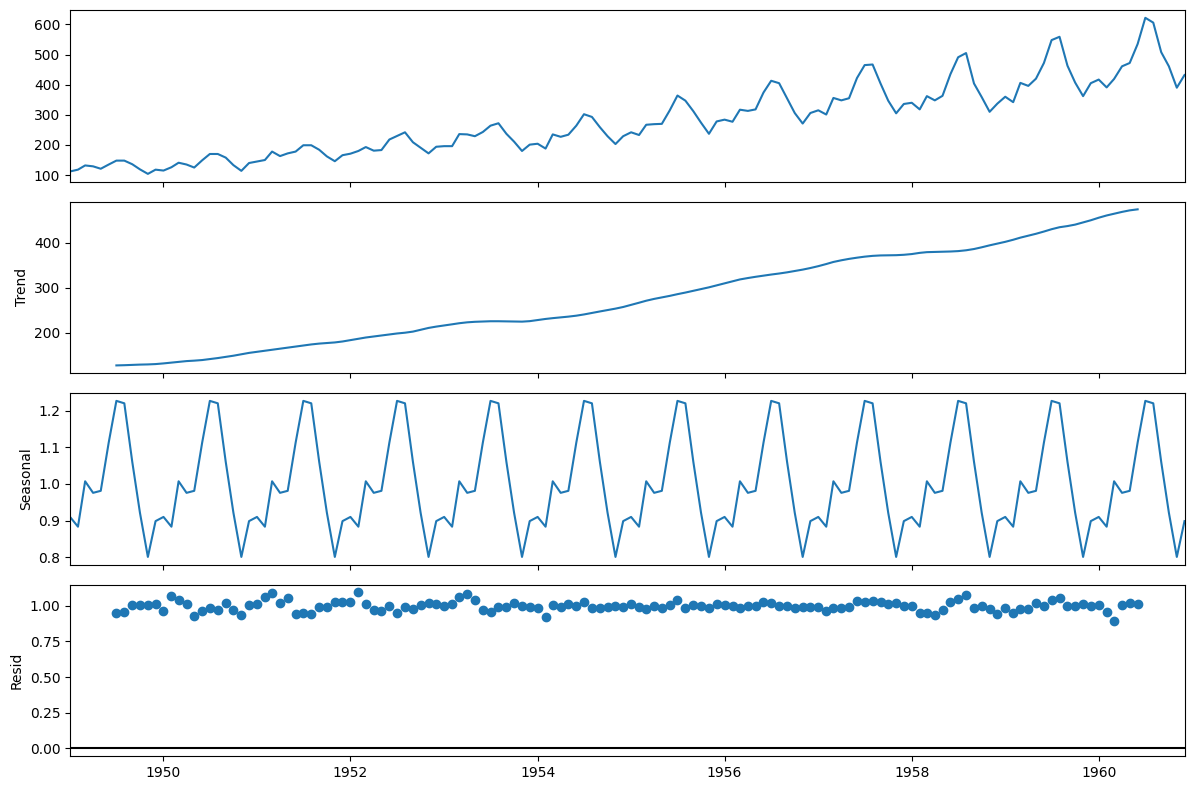

In [13]:
rcParams['figure.figsize'] = 12,8
Mul_decomposition.plot()
plt.show()

### Trend , Seasonality, Residual

In [14]:
trend_ad = Add_decomposition.trend
seasonality_ad = Add_decomposition.seasonal
residual_ad = Add_decomposition.resid

print("******* Trend *******", '\n', trend_ad.head(10), '\n')
print("******* Seasonality *******", '\n', seasonality_ad.head(10), '\n')
print("******* Residual *******", '\n', residual_ad.head(10), '\n')

******* Trend ******* 
 Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
Name: trend, dtype: float64 

******* Seasonality ******* 
 Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
1949-06-01    35.402778
1949-07-01    63.830808
1949-08-01    62.823232
1949-09-01    16.520202
1949-10-01   -20.642677
Name: seasonal, dtype: float64 

******* Residual ******* 
 Month
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
Name: resid, dtype: float64 



### Model Building

In [15]:
train = df[df.index<'1958']
test = df[df.index>='1958']

In [16]:
print(' Training Data ', train.shape)

 Training Data  (108, 1)


In [17]:
print("Test Data", test.shape)

Test Data (36, 1)


### Simple Exponential Smoothing

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tools.eval_measures as em
from   sklearn.metrics  import  mean_squared_error
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display import display
from   pylab import rcParams

In [19]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

/Users/tanmaireddy/miniconda3/envs/pytorch/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
model_SES_autofit = model_SES.fit(optimized=True)

In [21]:
SES_predict = model_SES_autofit.forecast(steps = len(test))

In [22]:
SES_predict

1958-01-01    335.986866
1958-02-01    335.986866
1958-03-01    335.986866
1958-04-01    335.986866
1958-05-01    335.986866
1958-06-01    335.986866
1958-07-01    335.986866
1958-08-01    335.986866
1958-09-01    335.986866
1958-10-01    335.986866
1958-11-01    335.986866
1958-12-01    335.986866
1959-01-01    335.986866
1959-02-01    335.986866
1959-03-01    335.986866
1959-04-01    335.986866
1959-05-01    335.986866
1959-06-01    335.986866
1959-07-01    335.986866
1959-08-01    335.986866
1959-09-01    335.986866
1959-10-01    335.986866
1959-11-01    335.986866
1959-12-01    335.986866
1960-01-01    335.986866
1960-02-01    335.986866
1960-03-01    335.986866
1960-04-01    335.986866
1960-05-01    335.986866
1960-06-01    335.986866
1960-07-01    335.986866
1960-08-01    335.986866
1960-09-01    335.986866
1960-10-01    335.986866
1960-11-01    335.986866
1960-12-01    335.986866
Freq: MS, dtype: float64

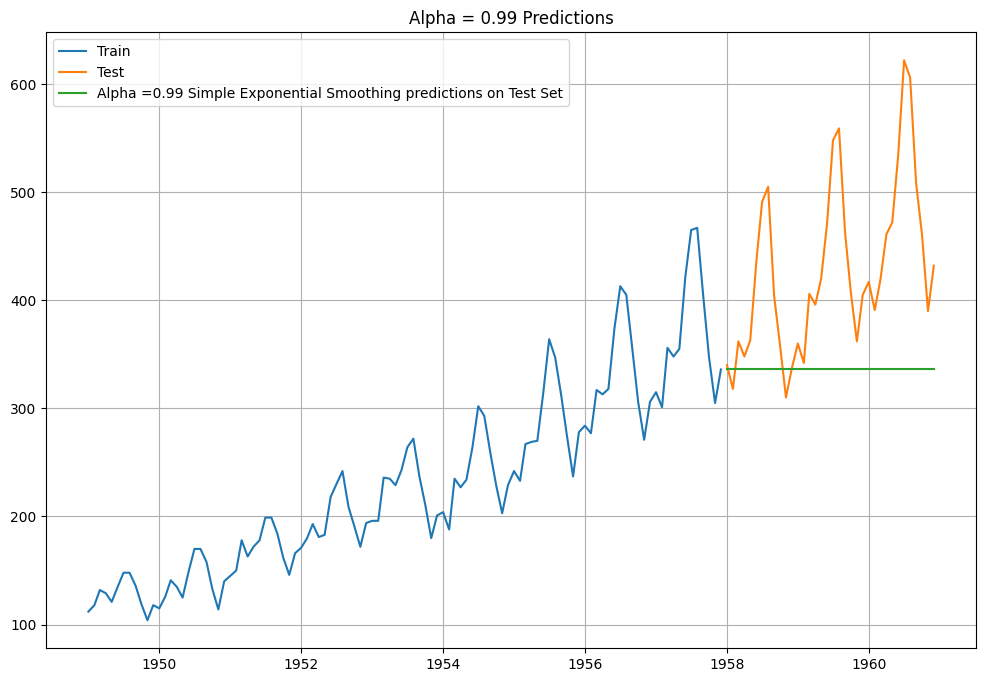

In [23]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [24]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [25]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))

SES RMSE: 121.14860934433315


/Users/tanmaireddy/miniconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
resultsDf = pd.DataFrame({'Test RMSE': [round(em.rmse(test.values,SES_predict.values)[0],2)]},index=['SES - Alpha=0.99'])
resultsDf

,Test RMSE
SES - Alpha=0.99,121.15


## Holts Model - Double Exponential Smooting

In [27]:
model_DES = Holt(train,initialization_method='estimated')

/Users/tanmaireddy/miniconda3/envs/pytorch/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [28]:
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.995, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 118.46666666666661, 'initial_trend': 2.060606060606076, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [29]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

1958-01-01    337.916485
1958-02-01    339.976576
1958-03-01    342.036666
1958-04-01    344.096756
1958-05-01    346.156846
1958-06-01    348.216937
1958-07-01    350.277027
1958-08-01    352.337117
1958-09-01    354.397207
1958-10-01    356.457298
1958-11-01    358.517388
1958-12-01    360.577478
1959-01-01    362.637568
1959-02-01    364.697659
1959-03-01    366.757749
1959-04-01    368.817839
1959-05-01    370.877929
1959-06-01    372.938020
1959-07-01    374.998110
1959-08-01    377.058200
1959-09-01    379.118290
1959-10-01    381.178381
1959-11-01    383.238471
1959-12-01    385.298561
1960-01-01    387.358651
1960-02-01    389.418742
1960-03-01    391.478832
1960-04-01    393.538922
1960-05-01    395.599012
1960-06-01    397.659103
1960-07-01    399.719193
1960-08-01    401.779283
1960-09-01    403.839373
1960-10-01    405.899464
1960-11-01    407.959554
1960-12-01    410.019644
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Alpha = 0.99 Predictions')

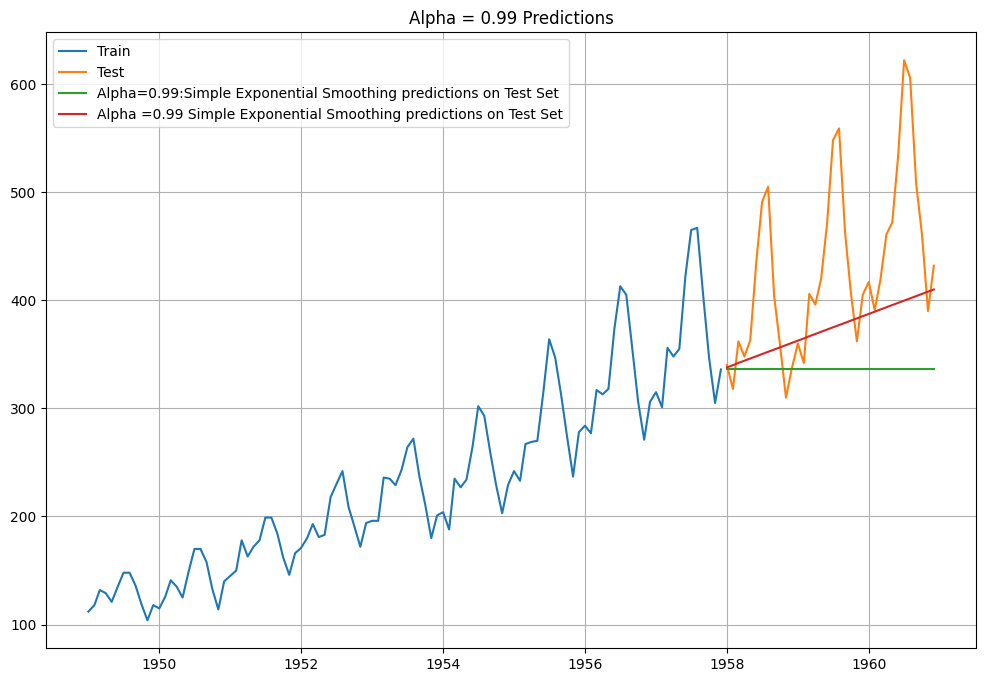

In [30]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions')

In [31]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 88.2702176639697


/Users/tanmaireddy/miniconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

/Users/tanmaireddy/miniconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Test RMSE
SES - Alpha=0.99,121.150000
"Alpha=1,Beta=0.0189:DES",88.270218


## Holt's WInter Model

In [33]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')

/Users/tanmaireddy/miniconda3/envs/pytorch/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [34]:
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.25062752278389094, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.749372477216109, 'damping_trend': nan, 'initial_level': 118.61764934455528, 'initial_trend': 2.483937289328052, 'initial_seasons': array([ -9.10147622,  -3.52620609,   8.96048891,   3.74154009,
        -4.99423268,   9.11956745,  21.32275258,  18.88417325,
         4.70606556, -14.1748314 , -28.74640495, -12.3124649 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [35]:
TES_predict =  model_TES.forecast(len(test))
TES_predict

1958-01-01    357.332239
1958-02-01    345.820021
1958-03-01    398.634376
1958-04-01    390.191787
1958-05-01    396.346162
1958-06-01    459.019194
1958-07-01    497.229568
1958-08-01    491.908847
1958-09-01    426.512506
1958-10-01    370.279387
1958-11-01    331.077942
1958-12-01    376.957815
1959-01-01    387.139486
1959-02-01    375.627268
1959-03-01    428.441623
1959-04-01    419.999035
1959-05-01    426.153410
1959-06-01    488.826441
1959-07-01    527.036815
1959-08-01    521.716094
1959-09-01    456.319753
1959-10-01    400.086635
1959-11-01    360.885189
1959-12-01    406.765062
1960-01-01    416.946733
1960-02-01    405.434516
1960-03-01    458.248871
1960-04-01    449.806282
1960-05-01    455.960657
1960-06-01    518.633689
1960-07-01    556.844062
1960-08-01    551.523342
1960-09-01    486.127001
1960-10-01    429.893882
1960-11-01    390.692437
1960-12-01    436.572310
Freq: MS, dtype: float64

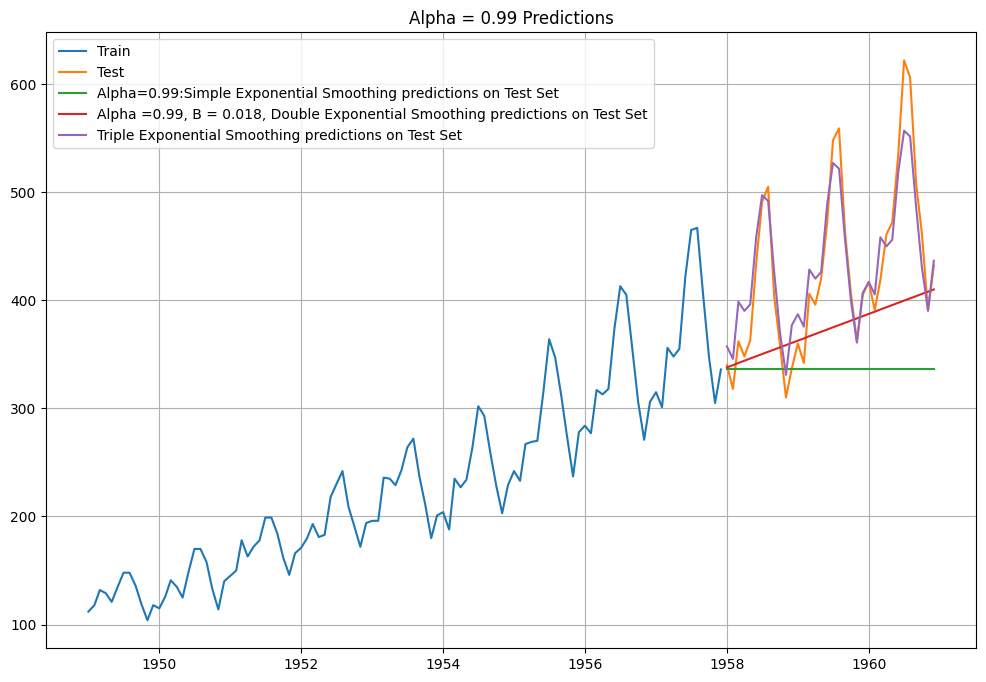

In [36]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha =0.99, B = 0.018, Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [37]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 26.375756410618013


/Users/tanmaireddy/miniconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

/Users/tanmaireddy/miniconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Test RMSE
SES - Alpha=0.99,121.150000
"Alpha=1,Beta=0.0189:DES",88.270218
TES,26.375756
